In [1]:
!pip install scikit-plot

In [2]:
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/245_1.csv', on_bad_lines='skip')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 40791


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31280 entries, 0 to 31279
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31280 non-null  object 
 1   brand                 31280 non-null  object 
 2   categories            31280 non-null  object 
 3   dateAdded             31280 non-null  object 
 4   dateUpdated           31280 non-null  object 
 5   ean                   20857 non-null  object 
 6   keys                  31279 non-null  object 
 7   manufacturer          31138 non-null  object 
 8   manufacturerNumber    31260 non-null  object 
 9   name                  31279 non-null  object 
 10  reviews.date          31233 non-null  object 
 11  reviews.dateAdded     31279 non-null  object 
 12  reviews.dateSeen      31279 non-null  object 
 13  reviews.didPurchase   16602 non-null  object 
 14  reviews.doRecommend   28620 non-null  object 
 15  reviews.id         

In [15]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5.0,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5.0,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1.0,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1.0,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [16]:
df.sample(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
12170,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",2015-09-11T18:17:13Z,2018-02-05T08:35:02Z,44600015996,"clorox/12992356,044600015996,cloroxdisinfectin...",Clorox,12992356,Clorox Disinfecting Wipes Value Pack Scented 1...,...,68304609.0,NaN,5.0,https://www.walmart.com/reviews/product/148983...,Great to have in the bathroom for quick cleani...,Convenient,NaN,NaN,MomNandN,44600015996
24310,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",2016-07-26T21:32:40Z,2018-02-05T10:22:44Z,NaN,"warnerhomevideo/15773884,883929388448,godzilla...",Test,15773884,Godzilla 3d Includes Digital Copy Ultraviolet ...,...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/6435036/review...,The extras are good but lack any deleted scene...,Solid DVD/BlueRay/UltraViolet Combo,NaN,NaN,KOTMFan69,8.83929E+11
11498,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",2015-09-11T18:17:13Z,2018-02-05T08:35:02Z,44600015996,"clorox/12992356,044600015996,cloroxdisinfectin...",Clorox,12992356,Clorox Disinfecting Wipes Value Pack Scented 1...,...,27991427.0,NaN,5.0,https://www.walmart.com/reviews/product/148983...,I love using these wipes. Great for the bathro...,Love it!,NaN,NaN,jbnfmly,44600015996
27372,AVpfR5m0LJeJML436K3W,Warner Music Group,"Music on CD or Vinyl,Country Music on CD or Vi...",2016-08-01T02:57:41Z,2018-02-05T08:36:40Z,"6,974,872,227,130,690,000,000,000","697487222720,warnermusicgroup/51400797,jasonal...",Broken Bow,51400797,Jason Aldean - They Don't Know,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5475202/review...,Bought this CD for my boyfriend to get is coll...,Who doesn't love JA!,NaN,NaN,dogmom4,"697,487,222,720,697,000,000,000"
23538,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",2016-07-26T21:32:40Z,2018-02-05T10:22:44Z,NaN,"warnerhomevideo/15773884,883929388448,godzilla...",Test,15773884,Godzilla 3d Includes Digital Copy Ultraviolet ...,...,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/6435036/review...,Not enough Godzilla in the movie. You only get...,Not enough Godzilla in the movie.,NaN,NaN,Danbt,8.83929E+11


In [18]:
df.shape

(39296, 25)

In [19]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

In [20]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 1
ean                     14555
keys                        1
manufacturer              142
manufacturerNumber         33
name                        1
reviews.date               65
reviews.dateAdded           1
reviews.dateSeen            1
reviews.didPurchase     21299
reviews.doRecommend      4280
reviews.id              21299
reviews.numHelpful      23483
reviews.rating              1
reviews.sourceURLs          1
reviews.text               30
reviews.title             239
reviews.userCity        35996
reviews.userProvince    39021
reviews.username           66
upc                         3
dtype: int64

In [23]:
#Selecting required columns - product review
df1 = df[['brand','manufacturer','reviews.didPurchase','reviews.rating', 'reviews.text']]

In [24]:
df1.isnull().sum()

brand                      0
manufacturer             142
reviews.didPurchase    21299
reviews.rating             1
reviews.text              30
dtype: int64

In [26]:
#Filling the null values
df1['reviews.didPurchase'] = df1['reviews.didPurchase'].fillna('Not Avialable')

In [27]:
df1 = df1.dropna()

In [55]:
#review rating distribution
data = df1['reviews.rating'].value_counts()

<Axes: xlabel='None'>

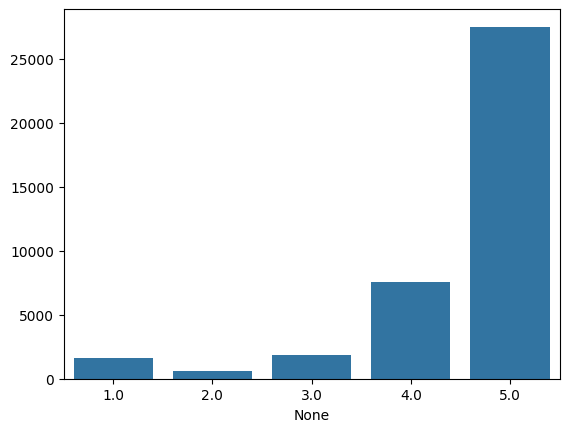

In [31]:
sns.barplot(x=data.index, y=data.values)

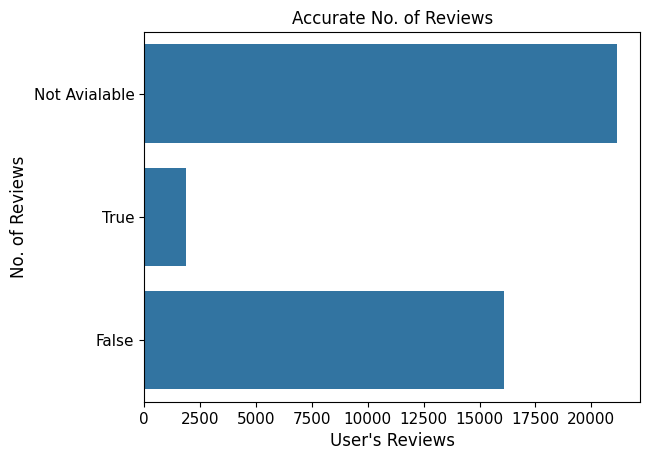

In [34]:
#need to map 1,2 - Unhappy, 3- OK, 4,5 - Unhappy
#Fake reviews provided by user
ax_plt = sns.countplot(df1['reviews.didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

True reviews are less in number and as we can see poeple who didn't even purchase the product has provided reviews these are all fake reviews which are much higher than those who have purchased and provided the review.

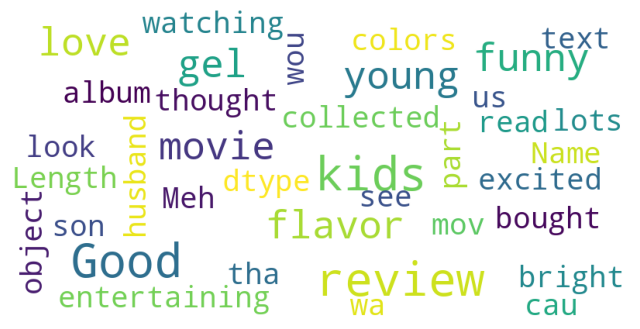

In [37]:
#wordcloud
stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(df1['reviews.text'])

In [39]:
#feature transformation
data=df1['reviews.text']
train_data=df1['reviews.text']
y_target=df1['reviews.rating'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [40]:
vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=10000)
vectorize_word.fit(data)
train_features_word = vectorize_word.transform(train_data)

In [41]:
vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)
vectorize_char.fit(data)
train_features_char = vectorize_char.transform(train_data)
train_features = hstack([train_features_char, train_features_word])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y_target,test_size=0.3,random_state=101,shuffle=True)

#SVC model

In [43]:
lsvm = LinearSVC(class_weight='balanced')
l = lsvm.fit(X_train,y_train)

In [44]:
#linear SVC matric over training
pred_train = l.predict(X_train)

In [45]:
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train)))
print(classification_report(y_train,pred_train))

Accuracy Train: 0.9977361521889948
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00     24578
          Ok       0.96      0.99      0.98      1276
     Unhappy       1.00      1.00      1.00      1533

    accuracy                           1.00     27387
   macro avg       0.99      1.00      0.99     27387
weighted avg       1.00      1.00      1.00     27387



In [46]:
#Linear SVC metric over test
pred_test=l.predict(X_test)

In [47]:
print("Accuracy Test : {}".format(accuracy_score(y_test,pred_test)))
print(classification_report(y_test,pred_test))

Accuracy Test : 0.9262225251320497
              precision    recall  f1-score   support

       Happy       0.96      0.97      0.96     10486
          Ok       0.44      0.35      0.39       570
     Unhappy       0.78      0.67      0.72       682

    accuracy                           0.93     11738
   macro avg       0.72      0.67      0.69     11738
weighted avg       0.92      0.93      0.92     11738



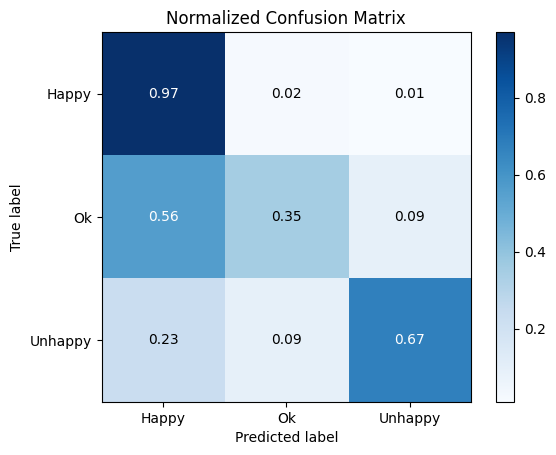

In [48]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)
plt.show()

#SGD classsifier

In [50]:
svm1 = SGDClassifier(class_weight='balanced', n_jobs=-1, max_iter=300)
svm1.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', max_iter=300, n_jobs=-1)

In [51]:
#SGD metric over traing
pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.9764121663563005
              precision    recall  f1-score   support

       Happy       0.99      0.98      0.99     24578
          Ok       0.77      0.87      0.81      1276
     Unhappy       0.92      0.97      0.95      1533

    accuracy                           0.98     27387
   macro avg       0.89      0.94      0.92     27387
weighted avg       0.98      0.98      0.98     27387



In [52]:
#SGD metric over test
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.9263077185210428
              precision    recall  f1-score   support

       Happy       0.96      0.97      0.96     10486
          Ok       0.43      0.38      0.40       570
     Unhappy       0.78      0.71      0.74       682

    accuracy                           0.93     11738
   macro avg       0.72      0.69      0.70     11738
weighted avg       0.92      0.93      0.92     11738



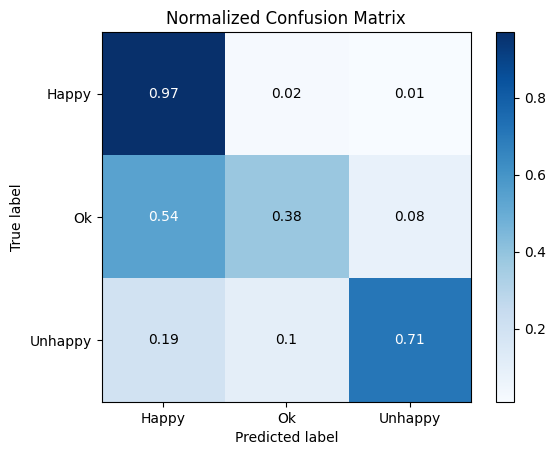

In [57]:
skplt.metrics.plot_confusion_matrix(y_test, pred_test_sgd, normalize=True)
plt.show()